<a href="https://colab.research.google.com/github/ShreyJais/NLP_MScAIML/blob/main/Shreyansh_558_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install nltk

#Write a program to get Antonyms from WordNet.

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
word = input("Enter a word to get antonyms:\t")
W = wn.synsets(word)
flag = 0
for i in range(len(W)):
  print("\nsynset name:\t", W[i].name())
  print("synset definition:\t", W[i].definition())
  w = wn.synset(W[i].name())
  #print(w.lemmas())
  for j in range(len(w.lemmas())):
    antonyms = w.lemmas()[j].antonyms()
    if(antonyms):
      print(f'antonyms({w.lemmas()[j].name()}):\t', antonyms[0].name())
      flag=1
    else:
      print("antonyms not found 😞\nTrying next synset")
  if(flag):
    break


Enter a word to get antonyms:	bad

synset name:	 bad.n.01
synset definition:	 that which is below standard or expectations as of ethics or decency
antonyms(bad):	 good
antonyms(badness):	 goodness


#Write a program for stemming non-English words.

In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer(language="russian")
words = ["бегать", "читаю", "пишут"]
stemmed_words = [stemmer.stem(word) for word in words]
print("Original words:", words)
print("Stemmed words:", stemmed_words)

Original words: ['бегать', 'читаю', 'пишут']
Stemmed words: ['бега', 'чита', 'пишут']


In [ ]:
print(SnowballStemmer.languages)

('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


#Write a program for lemmatizing words Using WordNet (Use all type of stemmers for the comparison).

In [ ]:
words = ["apples", "better", "fly", "Shreyansh", "eating", "eat", "eaten", "ate", "friend","friendship", "friends", "programer", "programming", "badly", "Universe", "Universal", "University"]

In [ ]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
l = []
for word in words:
  l.append(wnl.lemmatize(word))
l

['apple',
 'better',
 'fly',
 'Shreyansh',
 'eating',
 'eat',
 'eaten',
 'ate',
 'friend',
 'friendship',
 'friend',
 'programer',
 'programming',
 'badly',
 'Universe',
 'Universal',
 'University']

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
s1 = []
for word in words:
  s1.append(ps.stem(word))
s1

['appl',
 'better',
 'fli',
 'shreyansh',
 'eat',
 'eat',
 'eaten',
 'ate',
 'friend',
 'friendship',
 'friend',
 'program',
 'program',
 'badli',
 'univers',
 'univers',
 'univers']

In [ ]:
from nltk.stem import SnowballStemmer
ss = SnowballStemmer(language='english')
s2 = []
for word in words:
  s2.append(ss.stem(word))
s2

['appl',
 'better',
 'fli',
 'shreyansh',
 'eat',
 'eat',
 'eaten',
 'ate',
 'friend',
 'friendship',
 'friend',
 'program',
 'program',
 'bad',
 'univers',
 'univers',
 'univers']

In [ ]:
from nltk.stem import LancasterStemmer
ls = LancasterStemmer()
s3 = []
for word in words:
  s3.append(ls.stem(word))
s3

['appl',
 'bet',
 'fly',
 'shreyansh',
 'eat',
 'eat',
 'eat',
 'at',
 'friend',
 'friend',
 'friend',
 'program',
 'program',
 'bad',
 'univers',
 'univers',
 'univers']

#Write a program to differentiate stemming and lemmatizing words.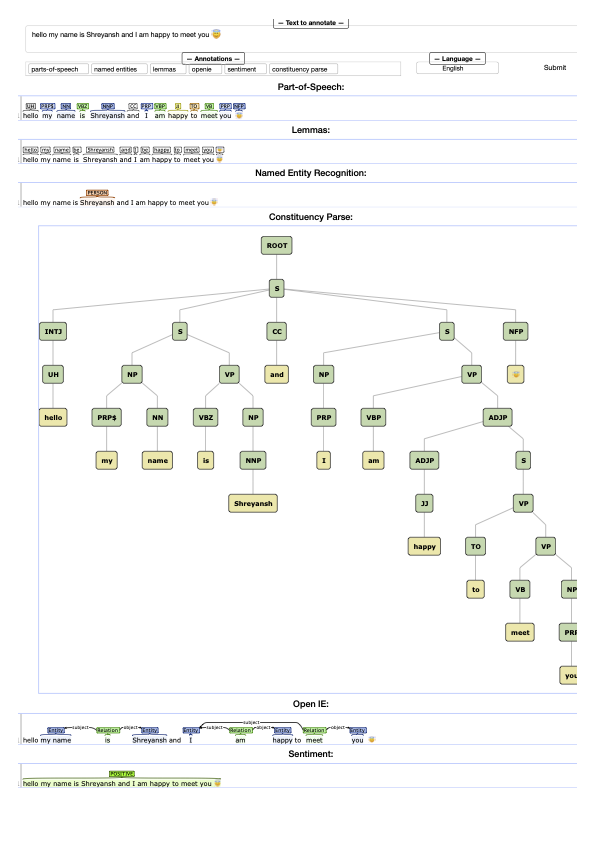

In [ ]:
import pandas as pd
df1 = pd.DataFrame(columns=['word', 'WordNetLemmatizer', 'PorterStemmer', 'SnowballStemmer', 'LancasterStemmer'])
df1.word=words
df1.WordNetLemmatizer = l
df1.PorterStemmer = s1
df1.SnowballStemmer = s2
df1.LancasterStemmer = s3
df1

,word,WordNetLemmatizer,PorterStemmer,SnowballStemmer,LancasterStemmer
0,apples,apple,appl,appl,appl
1,better,better,better,better,bet
2,fly,fly,fli,fli,fly
3,Shreyansh,Shreyansh,shreyansh,shreyansh,shreyansh
4,eating,eating,eat,eat,eat
5,eat,eat,eat,eat,eat
6,eaten,eaten,eaten,eaten,eat
7,ate,ate,ate,ate,at
8,friend,friend,friend,friend,friend
9,friendship,friendship,friendship,friendship,friend


* PorterStemmer (badly -> badli) meaning lost
* SnowballStemmer(badly -> bad) better than ps but sometime(fly -> fli)
* LancasterStemmer(fly -> fly , badly -> bad) better than ss but sometimes overstem (ate -> at) meaning changed
* WordNetLemmatizer (Universe, Universal, University ) meaning intact, perform best when passed pos also



In [ ]:
print("programer:\t", wnl.lemmatize("programer",pos='n'), "\nprogramming:\t", wnl.lemmatize("programming", pos='v'))

programer:	 programer 
programming:	 program


#Write a program for PoS Tagging

In [ ]:
Text = '''Hello myself Shreyansh Jaiswal and my My interested domain is social service.
In today's modern era, entire world is tech-sebi👨‍💻, people are busy in their daily chores🤳,💪,👨‍🏭 etc & they doesn't have time to entertain their family members 👪 rather ignore their loved ones & focusing on their so-called "social-media friends "better to say *Artificial Friends*. In today's world ,people doesn't even care getting socialised ,hence ignoring family functions👰 ,🤰,🎅 & prefer remaining alone in their so- called "privacy" but in my view ,it is extremely wrong. according to my opinion, the "social service is service to God"😊. Through social service, we are able to help the needy person which is the rarest thing found in today's world😌. Through social service, I get a sense of happiness 🙂 & by seeing them happy ,I feel proud 😎 & satisfied😇 & feel the day is worth-living. By helping the weak person in society/ the poor section ,the blessing 🙌 I get is priceless.
According to my view, social service is the most fascinating thing & through social service we get to know about the current reality & the challenges which are faced by lots of people around ourselves. In my view, social service is not just helping out the needy through money💰💸 but one can also help through providing remaining foods🍽🍛, old clothes👕🥼. woollen clothes🧥🧤, old books📚 etc. Every sunday, I along with my parents👨‍👩‍👦  used to go to the orphanage 🏯 to see children there eagerly waiting for us . We provide them sweets 🍭🥮, books📖 , pencils🖍🖊 and few clothes👚 for their daily use. The smile😄 that comes in their faces at the end is priceless and above all the valuable things of the world.
Email: shreyansh.jaiswal@msam.christuniversity.in
Phone Number: 9134567890
Date of birth: 27-March-2000.
years{2001, 2004, 2003, 2001, 2005, 2001, 2000, 2002, 2005, 2004, 2005}
invalid phone no. 0000000000'''
Text

'Hello myself Shreyansh Jaiswal and my My interested domain is social service.\nIn today\'s modern era, entire world is tech-sebi👨\u200d💻, people are busy in their daily chores🤳,💪,👨\u200d🏭 etc & they doesn\'t have time to entertain their family members 👪 rather ignore their loved ones & focusing on their so-called "social-media friends "better to say *Artificial Friends*. In today\'s world ,people doesn\'t even care getting socialised ,hence ignoring family functions👰 ,🤰,🎅 & prefer remaining alone in their so- called "privacy" but in my view ,it is extremely wrong. according to my opinion, the "social service is service to God"😊. Through social service, we are able to help the needy person which is the rarest thing found in today\'s world😌. Through social service, I get a sense of happiness 🙂 & by seeing them happy ,I feel proud 😎 & satisfied😇 & feel the day is worth-living. By helping the weak person in society/ the poor section ,the blessing 🙌 I get is priceless.\nAccording to my vie

In [ ]:
import re
def preprocesing(text):
    regex_pattern = r"[a-z0-9\s]"
    filtered_text = re.findall(regex_pattern, text.lower())
    result = ''.join(filtered_text)
    return result

In [ ]:
text = preprocesing(Text)

In [ ]:
text

'hello myself shreyansh jaiswal and my my interested domain is social service\nin todays modern era entire world is techsebi people are busy in their daily chores etc  they doesnt have time to entertain their family members  rather ignore their loved ones  focusing on their socalled socialmedia friends better to say artificial friends in todays world people doesnt even care getting socialised hence ignoring family functions   prefer remaining alone in their so called privacy but in my view it is extremely wrong according to my opinion the social service is service to god through social service we are able to help the needy person which is the rarest thing found in todays world through social service i get a sense of happiness   by seeing them happy i feel proud   satisfied  feel the day is worthliving by helping the weak person in society the poor section the blessing  i get is priceless\naccording to my view social service is the most fascinating thing  through social service we get t

In [ ]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

df = pd.DataFrame(columns=["TEXT", "LEMMA", "POS", "TAG", "DEP", "SHAPE", "ALPHA", "STOP"])
for i, token in enumerate(doc):
  df.loc[i] = {
    "TEXT": token.text,
    "LEMMA": token.lemma_,
    "POS": token.pos_,
    "TAG": token.tag_,
    "DEP": token.dep_,
    "SHAPE": token.shape_,
    "ALPHA": token.is_alpha,
    "STOP": token.is_stop
  }

In [ ]:
df

,TEXT,LEMMA,POS,TAG,DEP,SHAPE,ALPHA,STOP
0,hello,hello,INTJ,UH,intj,xxxx,True,False
1,myself,myself,PRON,PRP,dobj,xxxx,True,True
2,shreyansh,shreyansh,NOUN,NN,compound,xxxx,True,False
3,jaiswal,jaiswal,PROPN,NNP,dobj,xxxx,True,False
4,and,and,CCONJ,CC,cc,xxx,True,True
...,...,...,...,...,...,...,...,...
312,\n,\n,SPACE,_SP,dep,\n,False,False
313,invalid,invalid,ADJ,JJ,amod,xxxx,True,False
314,phone,phone,NOUN,NN,appos,xxxx,True,False
315,no,no,DET,DT,det,xx,True,True


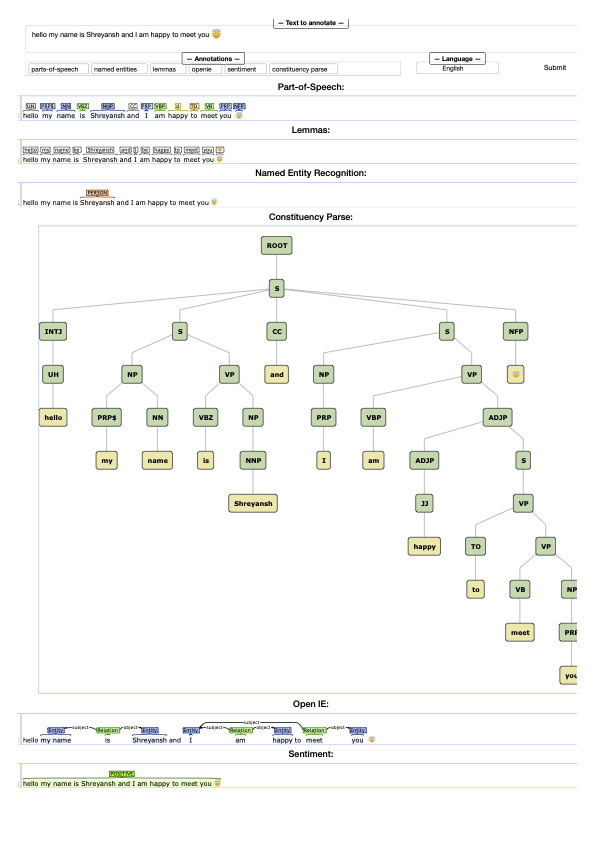

# Write a program to identify the Named Entity Recognition

In [ ]:
for ent in doc.ents:
  print(ent,ent.label_)

the day DATE
every sunday DATE
daily DATE
9134567890 CARDINAL
27march2000 CARDINAL
2004 2003 2001 2005 2001 2000 2002 DATE
2004 2005 DATE
0000000000 DATE


In [ ]:
from spacy import displacy
displacy.render(doc, style="dep")

In [ ]:
from spacy import displacy
displacy.render(doc, style="ent")

In [ ]:
from spacy import displacy
displacy.render(nlp(Text), style="ent")

# Implement the Dependency Parsing and Constituency Parsing using the tool.

Dependency Parsing


In [ ]:
from spacy import displacy
displacy.render(doc, style="dep")

Constituency Parsing

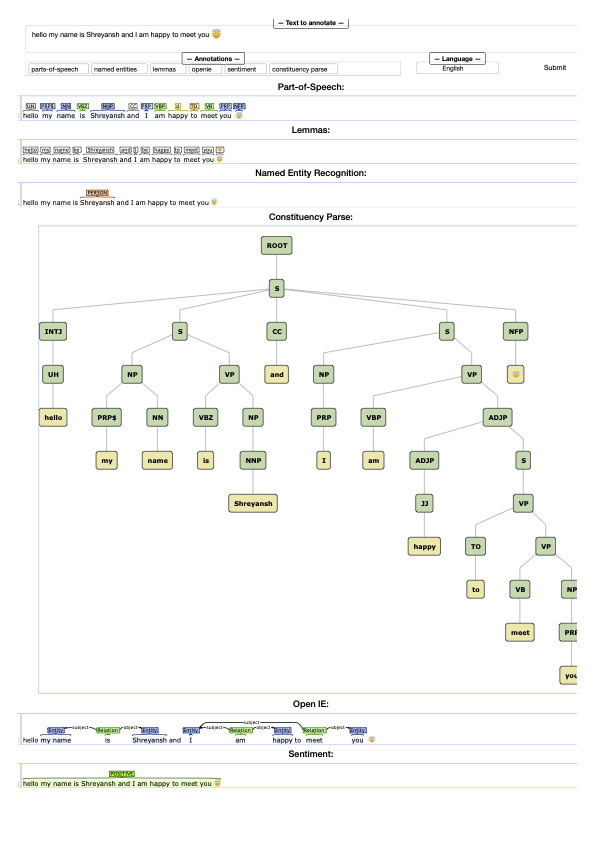